# Weather 

In [41]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [5]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [6]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

593

In [7]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | puerto el triunfo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | esfarayen
Processing Record 13 of Set 1 | kiunga
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | bijie
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | fort-shevchenko
Processing Record 20 of Set 1 | tautira
Processing Record 21 of Set 1 | astana
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | micheweni
Processing Recor

Processing Record 40 of Set 4 | katsiveli
City not found. Skipping
Processing Record 41 of Set 4 | darhan
Processing Record 42 of Set 4 | sinkat
City not found. Skipping
Processing Record 43 of Set 4 | las palmas
Processing Record 44 of Set 4 | ust-ordynskiy
Processing Record 45 of Set 4 | alness
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | novoagansk
Processing Record 48 of Set 4 | ambon
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | amderma
City not found. Skipping
Processing Record 1 of Set 5 | eureka
Processing Record 2 of Set 5 | taitung
Processing Record 3 of Set 5 | dubbo
Processing Record 4 of Set 5 | qui nhon
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | saint-nazaire
Processing Record 9 of Set 5 | puerto colombia
Processing Record 10 of Set 5 | misasi
Processing Record 11 of Set 5 | burns lake
Processing Record 

Processing Record 28 of Set 8 | ust-shonosha
Processing Record 29 of Set 8 | matelandia
Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | praia
Processing Record 32 of Set 8 | victoria
Processing Record 33 of Set 8 | bria
Processing Record 34 of Set 8 | zig
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | manlleu
Processing Record 37 of Set 8 | maraa
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | faya
Processing Record 40 of Set 8 | kjollefjord
Processing Record 41 of Set 8 | lolua
City not found. Skipping
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | gizo
Processing Record 44 of Set 8 | berbera
Processing Record 45 of Set 8 | collie
Processing Record 46 of Set 8 | punta alta
Processing Record 47 of Set 8 | olafsvik
Processing Record 48 of Set 8 | oksfjord
Processing Record 49 of Set 8 | hervey bay
Processing Record 50 of Set 8 | filadelfia
Processing Record 1 of Set 9 | hukuntsi
P

Processing Record 17 of Set 12 | rawson
Processing Record 18 of Set 12 | bhainsdehi
Processing Record 19 of Set 12 | pingliang
Processing Record 20 of Set 12 | narasapur
Processing Record 21 of Set 12 | wagar
Processing Record 22 of Set 12 | kisangani
Processing Record 23 of Set 12 | talgar
Processing Record 24 of Set 12 | ishigaki
Processing Record 25 of Set 12 | knysna
Processing Record 26 of Set 12 | wairoa
Processing Record 27 of Set 12 | lamar
Processing Record 28 of Set 12 | myanaung
Processing Record 29 of Set 12 | xiaoweizhai
Processing Record 30 of Set 12 | poopo
Processing Record 31 of Set 12 | vanavara
Processing Record 32 of Set 12 | seoul
Processing Record 33 of Set 12 | tuskegee
Processing Record 34 of Set 12 | antigonish
Processing Record 35 of Set 12 | pirovskoye
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | spokane
Processing Record 38 of Set 12 | ulaangom
Processing Record 39 of Set 12 | balykshi
City not found. Skipping
Processing Record

In [8]:
len(city_data)

542

In [9]:
# Add the data to a list in a dict then at the DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-08-17 22:16:43,42.60,-73.97,75.00,71,3,5.61
1,Hermanus,ZA,2020-08-17 22:14:09,-34.42,19.23,46.99,79,93,7.00
2,Dikson,RU,2020-08-17 22:16:44,73.51,80.55,50.13,93,76,13.00
3,Saint George,US,2020-08-17 22:15:18,37.10,-113.58,111.99,5,1,10.29
4,Puerto El Triunfo,SV,2020-08-17 22:16:44,13.28,-88.55,95.00,59,20,4.14


In [11]:
# Create CSV file of DF
csv_weather_file = "weather_data/cities.csv"
# Export CSV file 
city_data_df.to_csv(csv_weather_file, index_label="City_ID")

## Plot Weather Data

In [13]:
# Pull revelant Data from DF
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

### Latitude vs Max Temperature

<function matplotlib.pyplot.show(close=None, block=None)>

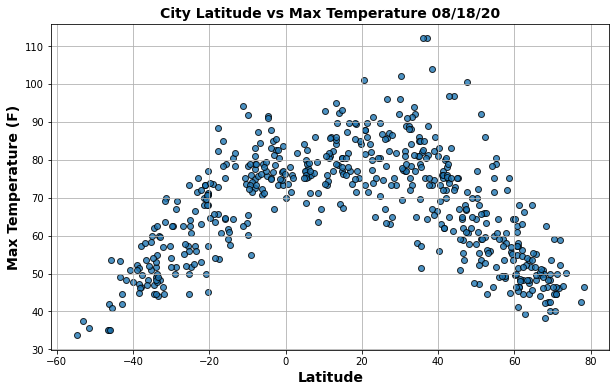

In [19]:
# Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig1.png')
plt.show

### Latitude vs Humidity

<function matplotlib.pyplot.show(close=None, block=None)>

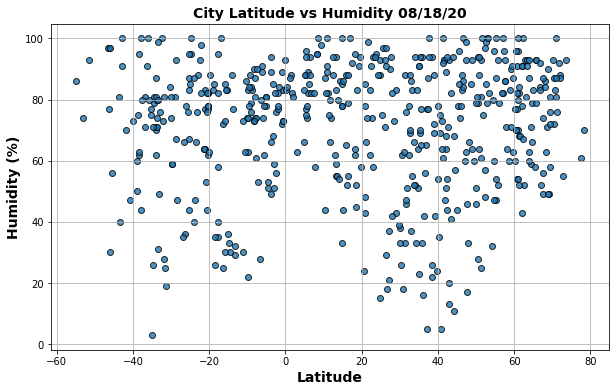

In [37]:
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig2.png')
plt.show

### Latitude vs Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

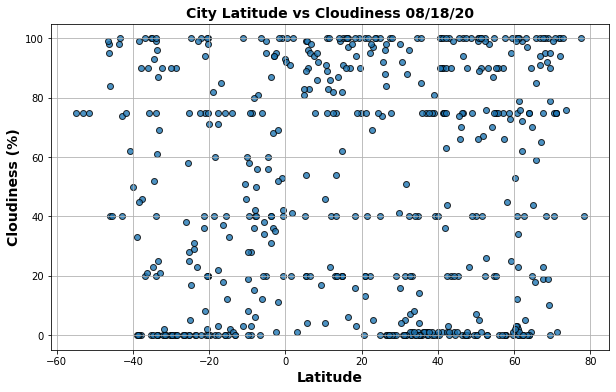

In [39]:
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig3.png')
plt.show

### Latitude vs Wind Speed

<function matplotlib.pyplot.show(close=None, block=None)>

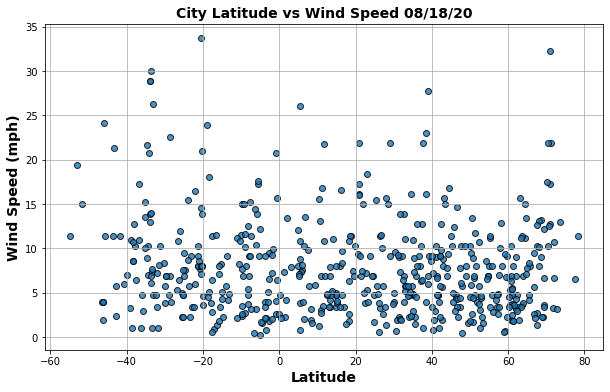

In [40]:
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig4.png')
plt.show

## Linear Regression of Data by Hemisphere

### Linear Regression Function

In [108]:
# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [109]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Linear Regression for Latitude vs Max Temperature by Hemisphere

      Slope  Intercept   r Value       p Value  Std Error
0 -0.533513  90.426793 -0.712939  3.281395e-56   0.027969


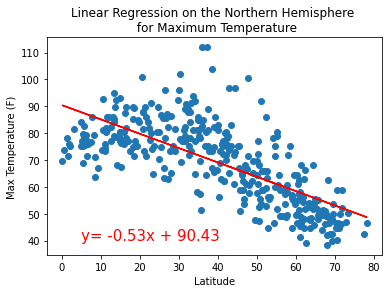

<Figure size 432x288 with 0 Axes>

In [129]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (5,40))
plt.savefig('weather_data/Fig5.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.857522  82.540028  0.836862  1.477998e-50   0.041129


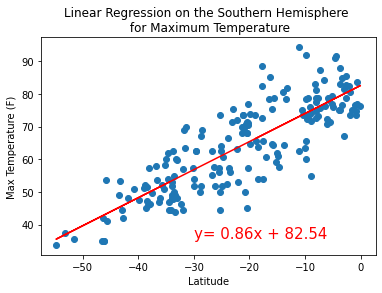

<Figure size 432x288 with 0 Axes>

In [130]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,36))
plt.savefig('weather_data/Fig6.png')

### Linear Regression for Latitude vs Humidity by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0  0.006719    71.7612  0.006255  0.906647   0.057256


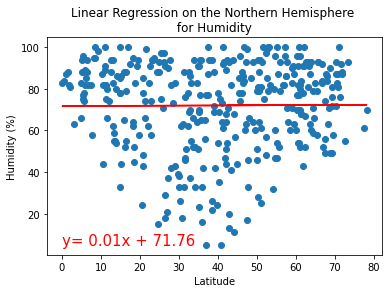

<Figure size 432x288 with 0 Axes>

In [131]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (0,5))
plt.savefig('weather_data/Fig7.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.007548  70.220101 -0.004968  0.946057   0.111414


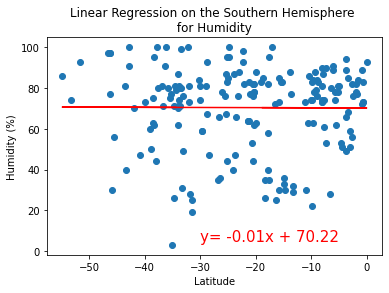

<Figure size 432x288 with 0 Axes>

In [132]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')

### Linear Regression for Latitude vs Cloudiness by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0 -0.087828  55.843751 -0.043875  0.410521   0.106593


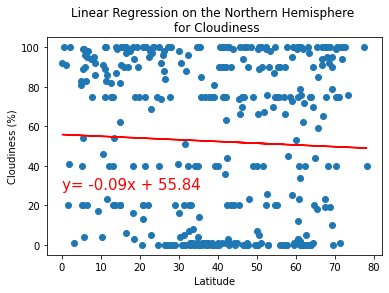

<Figure size 432x288 with 0 Axes>

In [133]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.159547  40.041346 -0.059091  0.420522   0.197629


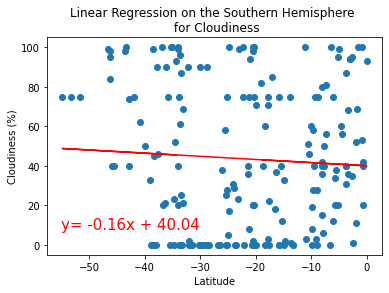

<Figure size 432x288 with 0 Axes>

In [134]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,8))
plt.savefig('weather_data/Fig10.png')

### Linear Regression for Latitude vs Wind Speed by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0  0.000434   7.280688  0.001771  0.973519   0.013065


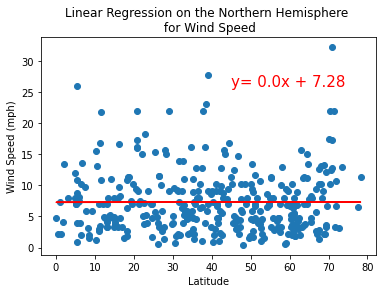

<Figure size 432x288 with 0 Axes>

In [135]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (45,26))
plt.savefig('weather_data/Fig11.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.090412   6.597345 -0.195625  0.007136   0.033233


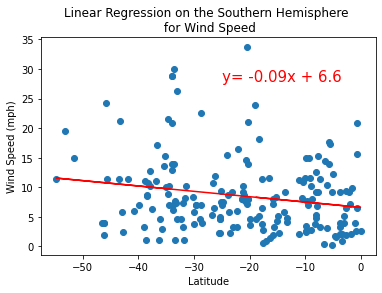

<Figure size 432x288 with 0 Axes>

In [136]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-25,28))
plt.savefig('weather_data/Fig12.png')